In [69]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

### Importing Dataset - MNIST

In [70]:
data_mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = data_mnist.load_data()

In [71]:
print(f"Number of training examples = {len(X_train)}")
print(f"Number of testing examples = {len(X_test)}")
print(X_train[0].shape) #The images are of 28x28 pixels and each cell shows the brightness value of 255

Number of training examples = 60000
Number of testing examples = 10000
(28, 28)


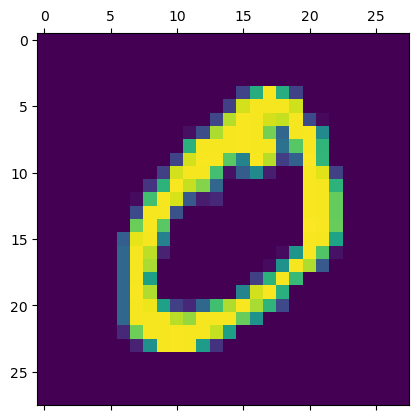

In [72]:
plt.matshow(X_train[1]) #Using matshow to represent 2d matrix as a visualisation

## Flattening our dataset
---
This is needed in order to use the brightness values in input layer

In [73]:
# Ranging each value from 0 to 1
# This increases the accuracy

X_train = X_train/255
X_test = X_test/255

In [74]:
# Using pandas to reshape the dataset

X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [82]:
from keras import Sequential
from keras.layers import Dense
from keras.losses import SparseCategoricalCrossentropy

model = Sequential([
    # Dense(15, activation='relu'),
    Dense(25, activation='relu'),
    Dense(10, activation='linear')
])

model.compile(
    optimizer='adam',
    loss=SparseCategoricalCrossentropy(from_logits=True), #Note: Using this to show softmax loss calculation
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 399us/step - accuracy: 0.8283 - loss: 0.6250
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 365us/step - accuracy: 0.9421 - loss: 0.1988
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 365us/step - accuracy: 0.9558 - loss: 0.1545
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 365us/step - accuracy: 0.9606 - loss: 0.1340
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 386us/step - accuracy: 0.9647 - loss: 0.1184
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 365us/step - accuracy: 0.9679 - loss: 0.1085
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 367us/step - accuracy: 0.9703 - loss: 0.0986
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 397us/step - accuracy: 0.9723 - loss: 0.0898
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 383us/step - accuracy: 0.9741 - loss: 0.0840
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 378us/step - accuracy: 0.9767 - loss: 0.0787


In [85]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - accuracy: 0.9603 - loss: 0.1414


[0.12002041935920715, 0.9656000137329102]

In [86]:
y_predict = model.predict(X_test_flattened)
y_predict

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step


array([[ -3.8235574 , -16.395569  ,  -0.80134463, ...,   9.871217  ,
         -0.5937568 ,  -1.2839104 ],
       [ -5.234144  ,   4.6179905 ,  11.487616  , ..., -13.047026  ,
         -2.9944015 , -12.973914  ],
       [ -3.5975761 ,   5.7345157 ,  -0.97913265, ...,  -0.75175786,
         -1.8714037 ,  -4.9543133 ],
       ...,
       [ -7.8940253 , -14.220314  ,  -7.6451406 , ...,   2.1835268 ,
         -0.3671389 ,   5.599798  ],
       [ -4.5727863 ,  -9.966396  , -12.2201805 , ...,  -3.560988  ,
          4.214144  ,  -6.053461  ],
       [  2.1680179 ,  -6.1968274 ,  -2.621703  , ...,  -6.7790184 ,
        -11.705156  , -10.638178  ]], dtype=float32)

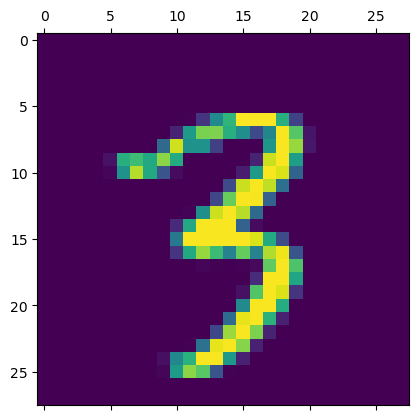

In [99]:
#Let us now check a random case

plt.matshow(X_test[577])

In [101]:
prediction = np.argmax(y_predict[577]) 

In [102]:
print(f"The predicted number for the above is: {prediction}")

The predicted number for the above is: 3
